In [ ]:
# - Running an application on top of the network 

In [ ]:
# 1. Form a network topology 
'''
Options:
 a. The topology is formed with this rules: 
  - Any other rules? 
 Change the network topology 
 b. How fanout affect it? 
'''
# 2. Decide on the number of peers and how they are connected and finding each other.
"""
a. Byzantine nodes 
b. Crashing nodes 
c. Slowdowns 
"""
# Add dissemination layer 

# 3. Adding storage on top of the network layer 

# 4. Computation tasks for the peers 

# Incentives experimetns 

# Sybil nodes added


# P2P environment 


## Introduction

Each blockchain work in a peer-to-peer environment. The 








In [66]:
from dataclasses import dataclass, field

In [31]:
@dataclass
class ConnectionConfig:
    ping_interval: int 
    max_silence: int
    min_keep_time: int
    min_peers: int
    max_peers: int
    peer_list_number: int
    peer_batch_request_number: int


In [32]:
c  = ConnectionConfig()

TypeError: __init__() missing 7 required positional arguments: 'ping_interval', 'max_silence', 'min_keep_time', 'min_peers', 'max_peers', 'peer_list_number', and 'peer_batch_request_number'

In [130]:
import typing
from dataclasses import dataclass, field, fields

In [2]:
from p2psimpy.config import Dist

In [ ]:
d = Dist()

In [3]:
d.generate()

NameError: name 'd' is not defined

In [135]:
@dataclass
class A:
    p: typing.Any 
    v: int = 1
        
    def __post_init__(self):
        if type(self.p) == Dist:
            self.p = self.p.generate()
    
    def __repr__(self):
        for k in fields(self):
            print(k)
        return 'fe'
    
    

In [147]:
B.__getattribute__

<slot wrapper '__getattribute__' of 'object' objects>

In [149]:
from enum import Enum

In [270]:
w = Wrap(Dist())

In [274]:
w.rep()

'Dist'

In [646]:
from yamlable import yaml_info, YamlAble

In [681]:
from random import choices

In [720]:

class Dist:
    
    def __init__(self, name: str, params: typing.Any):
        self.name = name
        self.params = params

    def to_repr(self):
        return {'name': self.name, 'params': str(self.params)}
    
    @classmethod
    def from_repr(cls, yaml_dict):
        return cls(**yaml_dict)
    
        
    #def __str__(self):
    #    return str({'Dist': {'name': self.name, 'params': str(self.params)}})

    def generate(self, n=1):
        """
        Generate 'n' random values with given distribution
        """
        if self.name == 'sample':
            weights = self.params['weights'] if 'weights' in self.params else None
            values = self.params['values'] if 'values' in self.params \
                else self.params
            weights = make_tuple(weights) if type(weights) == str else weights
            values = make_tuple(values) if type(values) == str else values
            res = choices(values, weights=weights, k=n)
            return res if n != 1 else res[0]

        dist = getattr(scipy.stats, self.name)
        param = make_tuple(self.params) if type(self.params) == str else self.params
        res = dist.rvs(*param[:-2], loc=param[-2], scale=param[-1], size=n)
        return res if n != 1 else res[0]

    def __get__(self, inst, obj):
        return self.generate(1)

In [721]:
class Wrap:
    def __init__(self, cls):
        self._wrap = cls

    def to_repr(self):
        return {self._wrap.__class__.__name__: self._wrap.to_repr()}

    @classmethod
    def from_repr(cls, yaml_dict):
        return cls(**yaml_dict)
    
    def __str__(self):
        return str(self._wrap)

    def get(self, inst=None, obj=None):
        return self._wrap.__get__(inst, obj)


class ConfigWrap:
    def __init__(self, cls):
        self.cls = cls

    def to_repr(self):
        return self.cls.repr()
    
    def __str__(self):
        return str(self.cls.repr())

    def get(self):
        return self.cls.get()

In [722]:
class Config:
    @classmethod
    def get_attr_repr(cls):
        for i in inspect.getmembers(cls):
            if not i[0].startswith('_') and not callable(i[1]):
                if type(i[1]) == Wrap or type(i[1]) == ConfigWrap:
                    yield i[0], i[1].to_repr()
                else:
                    yield i[0], i[1]

    @classmethod
    def repr(cls):
        root = dict()
        root[str(cls.__name__)] = dict()
        main = root[cls.__name__]
        main.update(cls.get_attr_repr())
        return root

    @classmethod
    def get(cls):
        full_dict = dict()
        for i in inspect.getmembers(cls):
            if not i[0].startswith('_') and not callable(i[1]):
                if type(i[1]) == Wrap or type(i[1]) == ConfigWrap:
                    full_dict[i[0]] = i[1].get()
                else:
                    full_dict.update((i[0], i[1]))
        return full_dict

In [723]:
v = {'name':'sample', 'params': "('Other', 'Loc', 'Loc2')"}
d = Dist.from_repr(v)

In [724]:
d.generate()

'Loc2'

In [719]:
PeerConfig.get()

ValueError: dictionary update sequence element #0 has length 7; 2 is required

In [731]:
PeerConfig.location._wrap

In [725]:
class PeerConfig(Config):
    location = Wrap( Dist('norm', (5, 1)))
    latency = Wrap( Dist('norm', (5, 1)))
    

In [728]:
class FullConfig(Config):
    peer_config = ConfigWrap( PeerConfig)
    peer2_config = ConfigWrap( PeerConfig)

In [732]:
PeerConfig.__dict__

mappingproxy({'__module__': '__main__',
              'location': <__main__.Wrap at 0x1090ecb10>,
              'latency': <__main__.Wrap at 0x1090ec0d0>,
              '__doc__': None})

In [745]:
class K:
    @dataclass
    class L:
        k:int = 2
        
        
    def __init__(self, conf):
        self.__dict__.update(conf)

In [750]:
class M(K):
    pass
    class L:
        m: int = 3

In [753]:
M.L.m

3

In [744]:
'location' in k.__dict__

True

In [736]:
k = K(PeerConfig.get())

In [740]:
k.latency

7.049218714314266

In [648]:
d = Dist('norm', '(5, 1)')

In [656]:
d.to_repr()

{'name': 'norm', 'params': '(5, 1)'}

In [638]:
val = {'fefe': {'fef1': 'f3f3', 'fefe': 'fefef'}}

In [694]:
with open('test.yoml') as s:
    k = yaml.safe_load( s)

In [701]:
d = Dist.from_repr(k['FullConfig']['peer2_config']['PeerConfig']['latency']['Dist'])

In [705]:
import scipy.stats
from ast import literal_eval as make_tuple

In [706]:
d.generate()

4.456666639733772

In [570]:
v = {'FullConfig': {'peer2_config': {'PeerConfig': {'latency': {'Dist': {'name': 'norm', 'params': '(5, 1)'}}, 'location': {'Dist': {'name': 'sample', 'params': "('Other', 'Loc', 'Loc2')"}}}},
  'peer_config': {'PeerConfig': {'latency': {'Dist': {'name': 'norm', 'params': '(5, 1)'}}, 'location': {'Dist': {'name': 'sample', 'params': "('Other', 'Loc', 'Loc2')"}}}}}}

In [604]:
v = FullConfig.repr()

In [606]:
v

'{\'FullConfig\': {\'peer2_config\': \'\\\'{\\\\\\\'PeerConfig\\\\\\\': {\\\\\\\'latency\\\\\\\': "{\\\\\\\'Dist\\\\\\\': {\\\\\\\'name\\\\\\\': \\\\\\\'norm\\\\\\\', \\\\\\\'params\\\\\\\': \\\\\\\'(5, 1)\\\\\\\'}}", \\\\\\\'location\\\\\\\': \\\\\\\'{\\\\\\\\\\\\\\\'Dist\\\\\\\\\\\\\\\': {\\\\\\\\\\\\\\\'name\\\\\\\\\\\\\\\': \\\\\\\\\\\\\\\'sample\\\\\\\\\\\\\\\', \\\\\\\\\\\\\\\'params\\\\\\\\\\\\\\\': "(\\\\\\\\\\\\\\\'Other\\\\\\\\\\\\\\\', \\\\\\\\\\\\\\\'Loc\\\\\\\\\\\\\\\', \\\\\\\\\\\\\\\'Loc2\\\\\\\\\\\\\\\')"}}\\\\\\\'}}\\\'\', \'peer_config\': \'\\\'{\\\\\\\'PeerConfig\\\\\\\': {\\\\\\\'latency\\\\\\\': "{\\\\\\\'Dist\\\\\\\': {\\\\\\\'name\\\\\\\': \\\\\\\'norm\\\\\\\', \\\\\\\'params\\\\\\\': \\\\\\\'(5, 1)\\\\\\\'}}", \\\\\\\'location\\\\\\\': \\\\\\\'{\\\\\\\\\\\\\\\'Dist\\\\\\\\\\\\\\\': {\\\\\\\\\\\\\\\'name\\\\\\\\\\\\\\\': \\\\\\\\\\\\\\\'sample\\\\\\\\\\\\\\\', \\\\\\\\\\\\\\\'params\\\\\\\\\\\\\\\': "(\\\\\\\\\\\\\\\'Other\\\\\\\\\\\\\\\', \\\\\\\\\\\\\\\'Loc\\\\

In [605]:
v['FullConfig']['peer2_config']

TypeError: string indices must be integers

In [410]:
PeerConfig.repr()

{'PeerConfig': {'latency': Dist(name='norm', params=(5, 1)),
  'location': Dist(name='sample', params=('Other', 'Loc', 'Loc2'))}}

In [417]:
print(dict(PeerConfig.get()))


{'latency': 5.447048390257572, 'location': 'Loc'}


In [338]:
Config.repr()

{'Config': {'fl': Dist(name='norm', params=(5, 1))}}

In [300]:
repr(Config.fl)

"Dist(name='norm', params=(5, 1))"

In [301]:
Config.get_attr()

{'fl': Dist(name='norm', params=(5, 1))}

In [282]:
Config.fl

5.115875198929158

In [268]:
inspect.getmembers(Config)

[('__class__', type),
 ('__delattr__', <slot wrapper '__delattr__' of 'object' objects>),
 ('__dict__',
  mappingproxy({'__module__': '__main__',
                'fl': <__main__.Wrap at 0x1a1dc5ff10>,
                'get_attr': <classmethod at 0x1a1dc5ff90>,
                'repr': <classmethod at 0x1a1dc5f6d0>,
                '__dict__': <attribute '__dict__' of 'Config' objects>,
                '__weakref__': <attribute '__weakref__' of 'Config' objects>,
                '__doc__': None})),
 ('__dir__', <method '__dir__' of 'object' objects>),
 ('__doc__', None),
 ('__eq__', <slot wrapper '__eq__' of 'object' objects>),
 ('__format__', <method '__format__' of 'object' objects>),
 ('__ge__', <slot wrapper '__ge__' of 'object' objects>),
 ('__getattribute__', <slot wrapper '__getattribute__' of 'object' objects>),
 ('__gt__', <slot wrapper '__gt__' of 'object' objects>),
 ('__hash__', <slot wrapper '__hash__' of 'object' objects>),
 ('__init__', <slot wrapper '__init__' of 'object' 

In [261]:
Config.fl

2.976644971623131

In [254]:
Config.repr()

{'Config': {'fl': Dist(name='norm', params=(5, 1))}}

In [170]:
inspect.getmembers(Config, lambda a:not(inspect.isroutine(a)))

[('__class__', type),
 ('__dict__',
  mappingproxy({'__module__': '__main__',
                'fl': Dist(name='norm', params=(5, 1)),
                '__dict__': <attribute '__dict__' of 'Config' objects>,
                '__weakref__': <attribute '__weakref__' of 'Config' objects>,
                '__doc__': None})),
 ('__doc__', None),
 ('__module__', '__main__'),
 ('__weakref__', <attribute '__weakref__' of 'Config' objects>),
 ('fl', 3.600098720576689)]

In [175]:
variables = [i for i in dir(Config) if not callable(i) and not i.startswith('_')]

In [183]:
import inspect 
  
class Number : 
      
    # Class Attributes 
    one = 'first'
    two = 'second'
    three = 'third'
      
    def __init__(self, attr): 
        self.attr = attr 
          
    def show(self):  
        print(self.one, self.two, self.three, self.attr) 
          
for i in inspect.getmembers(Number): 
      
    # to remove private and protected 
    # functions 
    if not : 
          
        # To remove other methods that 
        # doesnot start with a underscore 
        if :  
            print(i) 


('one', 'first')
('three', 'third')
('two', 'second')


In [176]:
variables

['fl']

In [142]:
class B(object):
    fl = Dist('norm', (5, 1))
    
    

In [137]:
b = B(Dist('sample', ('fdedeef', 'fedededfe')))

In [138]:
repr(b)

Field(name='p',type=typing.Any,default=<dataclasses._MISSING_TYPE object at 0x10ab6fe50>,default_factory=<dataclasses._MISSING_TYPE object at 0x10ab6fe50>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD)
Field(name='v',type=<class 'int'>,default=1,default_factory=<dataclasses._MISSING_TYPE object at 0x10ab6fe50>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD)


'fe'

In [128]:
b.fl

5.976751414416254

In [108]:
b = A()
b.p

TypeError: __init__() missing 1 required positional argument: 'p'

In [80]:
d = Dist('fef', (2, 3))

In [72]:
import yaml

In [81]:
with open("test.yml", 'w') as s:
    yaml.safe_dump(repr(d), s)

In [77]:
with open("test.yml") as s:
    val = yaml.safe_load(s)

In [78]:
val

'A(_p=99.67633238744052, v=5)'

In [73]:
a= A()

In [68]:
a = A(Dist('norm', (5, 1)))

In [71]:
a._p

Dist(name='norm', params=(5, 1))

In [69]:
a.p()

3.8259615222292496

In [40]:
a.p

5.2345374255440715

In [6]:
b = B()
l = b.l

TypeError: __init__() missing 1 required positional argument: 'l'

In [19]:
l

Dist()

In [12]:
k1 = K(B())

NameError: name 'K' is not defined

TypeError: __get__() missing 2 required positional arguments: 'inst' and 'obj'

In [79]:
class K:
    
    def __init__(self, config):
        self.config = config
        
class M:
    
    def __init__(self, config):
        self.__dict__.update(config.__dict__)
    

In [80]:
k1 = K(B())

In [81]:
k2 = M(B())

In [82]:
%%timeit
k1.config.l

103 ns ± 4.11 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [83]:
%%timeit
k2.l

66.3 ns ± 2.08 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [71]:
d = Dist()

In [41]:
b = B(1, 2)

In [56]:
c = C(1, 4, 'fefe')

In [63]:
b= B(1, 2)

TypeError: __post_init__() missing 1 required positional argument: 'kl'

In [27]:
c.__dict__

{}

In [18]:
import attr

@attr.s
class ConnectionConfig:
    ping_interval = attr.ib(default=1)
    max_silence = attr.ib(default=1)
    min_keep_time = attr.ib(default=1)
    min_peers = attr.ib(default=1)
    max_peers = attr.ib(default=1)
    peer_list_number = attr.ib(default=2)
    peer_batch_request_number = attr.ib(default=4)

In [19]:
c = ConnectionConfig()

In [20]:
c.__dict__

{'ping_interval': 1,
 'max_silence': 1,
 'min_keep_time': 1,
 'min_peers': 1,
 'max_peers': 1,
 'peer_list_number': 2,
 'peer_batch_request_number': 4}

In [ ]:
# Simulation of a peer-to-peer environment
from p2psimpy.simulation import BaseSimulation

# Define the simulation - logger dictionary  

sim = BaseSimulation()
# add services to the simulation





## TODO: add service to peer type 
sim.add_peer_service('basic', TxGossipService, gossip_config)
sim.add_peer_service('basic', TransactionProducer, tx_producer_config)
sim.add_peer_service('bootstrap', MockHandler, MockConfig(messages=[GossipMessage, TxMessage]))
#sim.add_peer_service('basic', MockHandler, MockConfig(messages=[GossipMessage, TxMessage]))

sim.init_bootstrap_servers()

sim.add_peers(peer_num)
sim.start_all_peers()

sim.run(3600) # in ms 

In [ ]:
# Message gossip
from p2psimpy.services.base import BaseHandler, BaseRunner, MockHandler
from p2psimpy.peer import Peer
from p2psimpy.storage import Storage
from p2psimpy.messages import BaseMessage

from attr import dataclass
from random import choice


class GossipMessage(BaseMessage):

    def __init__(self, sender, data, ttl):
        super().__init__(sender, data)
        self.ttl = ttl

class TxMessage(GossipMessage): pass
class BlockMessage(GossipMessage): pass
        
@dataclass
class GossipConfig:
    fanout: int


class GossipService(BaseHandler):
    """
    Simple gossip service to handle gossip messages and rely them to neighbors. 
    """

    def __init__(self, peer, config):
        super().__init__(peer, config)

    def handle_message(self, msg):
        if isinstance(msg, GossipMessage):
            if msg.ttl > 0:
                # Rely message further, modify the message
                sender = msg.sender
                msg.sender = self.peer
                msg.ttl -= 1
                self.peer.gossip(msg, self.config.fanout, {sender})

    @property
    def messages(self):
        return GossipMessage,


class TxGossipService(GossipService):

    def __init__(self, peer, config):
        super().__init__(peer, config)
        #self.peer.add_storage('tx_store', Storage())
    
    def handle_message(self, msg):
        #self.peer.store('tx_store', msg.data.tx_id, msg)
        super().handle_message(msg)
    
    @property
    def messages(self):
        return TxMessage,


@dataclass
class MonetaryTransaction:
    sender: str
    receiver: str
    amount: int
    tx_id: str


@dataclass
class TransactionProducerConfig:
    receivers: list
    tx_rate: int
    init_ttl: int
    init_fanout: int
    init_timeout: int


class TransactionProducer(BaseRunner):

    def __init__(self, peer, config: TransactionProducerConfig):
        super().__init__(peer, config)
        # calculate tx_interval:
        self.tx_interval = 1000 / self.config.tx_rate
        self.counter = 1 

    def produce_transaction(self):
        # select receiver
        receiver = choice(self.config.receivers)
        tx = MonetaryTransaction(self.peer.name, receiver, 1, self.peer.name +"_"+ str(self.counter))
        # gossip the trasaction to the network
        self.counter += 1
        msg = TxMessage(self.peer, tx, self.config.init_ttl)
        self.peer.gossip(msg, self.config.init_fanout)
        

    def run(self):
        yield self.env.timeout(self.config.init_timeout)
        while True:
            self.produce_transaction()
            yield self.env.timeout(self.tx_interval)


@dataclass
class MockConfig:
    messages: list

In [4]:
from p2psimpy.logger import init_log, reset_log
reset_log()


In [3]:
import yaml

In [4]:
class Test:
    
    def __init__(self):
        self.t1 = 2
        self.t2 = 3
        

In [5]:
t1 = Test()

In [6]:
with open("test.yaml", 'w') as s:
    yaml.dump(t1, s)

In [10]:
with open('test.yaml') as s:
    t2 = yaml.safe_load(s)

ConstructorError: could not determine a constructor for the tag 'tag:yaml.org,2002:python/object:__main__.Test'
  in "test.yaml", line 1, column 1

In [9]:
t2.t1

2

In [ ]:
class fefService(BaseSer)
 config_calss = ferfConfig

In [ ]:
class ByznatinePeer(Peer):
    services = {fefef, fefe, fefe}
    config_class = ByzantinePeerConfig
    

In [ ]:
f=  FefeConfig(fefef, fefef)

sim = 20 peers Byznaine with Congigs 


In [5]:


peer_num = 30


gossip_config = GossipConfig(fanout=5)
receivers = ['basic_'+str(i+1) for i in range(peer_num)]
tx_producer_config = TransactionProducerConfig(receivers=receivers,
                                               tx_rate=3, 
                                               init_ttl=3,
                                               init_fanout=5, 
                                               init_timeout=2000) 

    
    




In [ ]:
# Investigate the peer storage 
sim.peers['basic'][0].storage['tx_store'].txs


In [6]:
run_sim()

In [7]:
run_sim()

KeyError: 'tx_store'

In [4]:
sim.run(4600)

In [7]:
%matplotlib inline

In [9]:
G.degree()

DegreeView({'basic_1': 25, 'basic_31': 19, 'basic_44': 22, 'basic_5': 14, 'basic_16': 15, 'basic_6': 18, 'basic_27': 15, 'basic_38': 15, 'basic_35': 17, 'basic_33': 15, 'basic_34': 20, 'basic_10': 17, 'basic_17': 18, 'basic_4': 15, 'basic_3': 21, 'basic_29': 17, 'basic_56': 15, 'basic_39': 18, 'basic_37': 14, 'basic_23': 17, 'basic_2': 15, 'basic_40': 23, 'basic_32': 27, 'basic_49': 20, 'basic_25': 15, 'basic_15': 15, 'basic_57': 21, 'basic_20': 17, 'basic_28': 17, 'basic_53': 17, 'basic_47': 17, 'basic_54': 16, 'basic_41': 20, 'basic_51': 20, 'basic_48': 21, 'basic_22': 17, 'basic_60': 19, 'basic_21': 19, 'basic_52': 17, 'basic_12': 23, 'basic_45': 18, 'basic_8': 17, 'basic_14': 15, 'basic_30': 14, 'basic_24': 16, 'basic_26': 19, 'basic_36': 14, 'basic_46': 14, 'basic_9': 20, 'basic_55': 14, 'basic_18': 19, 'basic_11': 20, 'basic_7': 14, 'basic_43': 18, 'basic_42': 14, 'basic_19': 23, 'basic_59': 20, 'basic_58': 17, 'basic_13': 21, 'basic_50': 18})

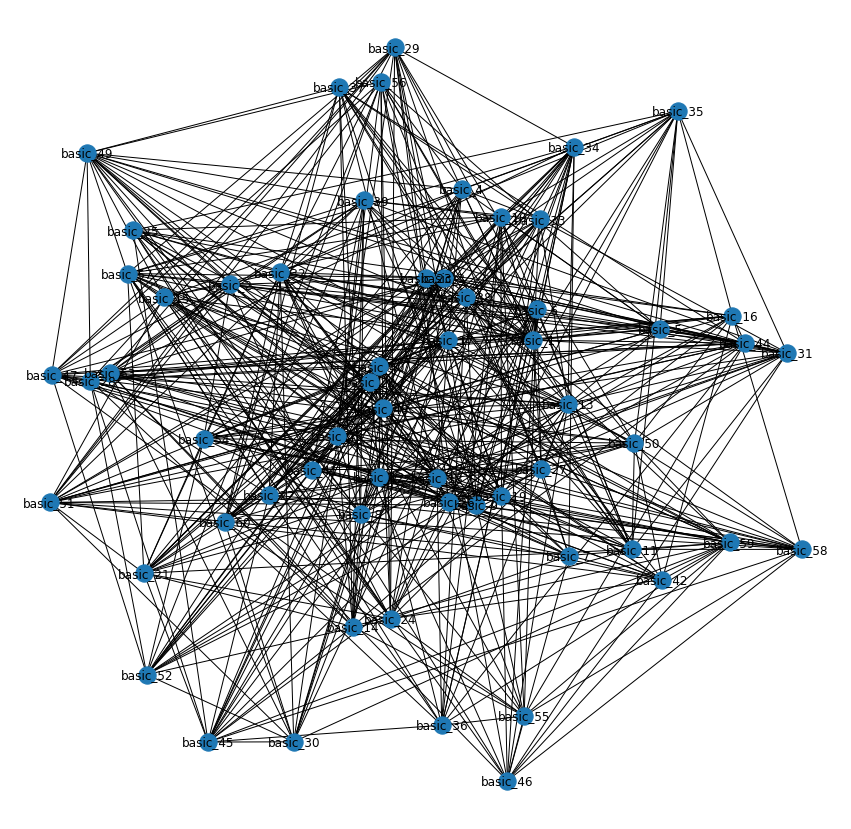

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation
from networkx.drawing.nx_agraph import graphviz_layout

from time import time, sleep


G = sim.get_graph()
fig = plt.figure(figsize=(15, 15))
plt.axis('off')
#pos = nx.shell_layout(G)
pos = nx.kamada_kawai_layout(G)

nx.draw_networkx(G, pos)

In [ ]:
from simpy import Environment
evn = Environment
School()